<a href="https://colab.research.google.com/github/PEA-IA-DS-Proyecto-1/HomePricePredictorBCN/blob/main/Extracci%C3%B3n_y_preparaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Uso de SQL y Python:** Extraer los datos de precios de viviendas desde el portal Fotocasa. Se requiere que los datos sean almacenados en una base de datos y manipulados usando SQL para su posterior análisis.

Consideramos que no es necerario realizar ninguna acción en este punto puesto que ya existe el Dataset que ha sido extraido de la web de Fotocasa

### **Formulación del problema de negocio:** El equipo debe definir claramente el problema de predicción, identificando las variables relevantes como la ubicación (código postal o coordenadas), tamaño del inmueble, número de habitaciones, antigüedad, entre otras.

Pensamos que el problema de prediccion viene determinado por el propio proyecto y que no precisa de mayor  precisíon. En cuanto a la identificación de las variables relevantes, consideramos que debido a la poca información que posee cada  registro todas las variables pueden ser de utilidad o bien para el EDA o bien para el modelado predictivo. **(Queda pendiente de valoración al realizar el modelado predictivo no he hecho ningun añalisis para determinar esto**)

# 1.  **Preparación del dataset:**

A través de Python y SQL, se debe limpiar y transformar el dataset para eliminar inconsistencias, manejar valores nulos y realizar una correcta codificación de las variables categóricas.

Los pasos que vamos a seguir para preparar nuestro Dataset van a ser los siguientes

1. **EDA Básico a origen y Revisar Datos Faltantes**:
   - Identificación campos vacíos o nulos.
   - Decisión de imitar, eliminar o completar esos datos según su importancia.

2. **Verificar Valores Inconsistentes**:
   - Nos aseguraremos de que los rangos de superficie, precio, baños y habitaciones sean razonables.
   - Por ejemplo, que el precio no sea negativo o que la superficie tenga una cifra lógica en relación con la cantidad de habitaciones.

3. **Normalización de Datos**:
   - Unificaremos formatos en caso necesario (por ejemplo, convertir los precios a una sola moneda o utilizar la misma unidad para la superficie).
   - Para las categorías barrio y tipo de propiedad, nos aseguraremos de que no haya variaciones en la escritura (p. ej., "Eixample" contra "eixample").

4. **Eliminación de Duplicados**:
   - Buscaremos entradas duplicadas que puedan distorsionar el análisis.

5. **Manejo de los Outliers**:
   - Identificaremos valores atípicos que podrían ser errores de entrada (por ejemplo, un precio de alquiler extremadamente alto o bajo) y decidiremos si lo mantenemos, lo corregimos o lo eliminamos.

6. **Validación de Categorías Booleanas**:
   - Para el ascensor y la terraza, asegúrarnos de que los valores sean consistentes (por ejemplo, "sí" / "no" o 1/0 o Verdadero/Falso, etc.).

7. **Conversión de Tipos de Datos**:
   - Asegúrarnos de que cada columna tiene el tipo de dato adecuado y en caso contrario convertirlo, como por ejemplo el precio a formato numérico si está en texto.


Otros aspectos que consideraremos antes y despues de la preparación del Dataset son:

**PREVIO A LA PREPARACION**

**Establecimiento de Estructura del DataSet**:
   - Dicha estructura ha quedado definida durante la formulación del problema de negocio que a su vez viene determinada por el propio proyecto, tal como se explica en puntos anteriores.

**POSTERIOR A LA PREPARACION**

**Documentación de Cambios**:
   - Mantendremos un registro de todas las modificaciones realizadas al dataset para conseguir transparencia y facilitar auditorías o revisiones.

**PREVIO Y POSTERIOR A LA PREPARACION**

**Visualización Inicial y Final**:
    - Visualizaremos el dataset antes y después de la limpieza para entender el impacto de los cambios.

1. **EDA Basico a origen y Revisar Datos Faltantes**

        FASE DE EDA BASICA A ORIGEN

In [35]:
#Importar librerias y DataSet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/PEA-IA-DS-Proyecto-1/HomePricePredictorBCN/main/Barcelona_Fotocasa_HousingPrices.csv'
df = pd.read_csv(url)

In [36]:
#Listar los campos del Dataset
df.columns.tolist()

['Unnamed: 0',
 'price',
 'rooms',
 'bathroom',
 'lift',
 'terrace',
 'square_meters',
 'real_state',
 'neighborhood',
 'square_meters_price']

In [37]:
#Listar informacion del Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8188 non-null   int64  
 1   price                8188 non-null   int64  
 2   rooms                8188 non-null   int64  
 3   bathroom             8188 non-null   int64  
 4   lift                 8188 non-null   bool   
 5   terrace              8188 non-null   bool   
 6   square_meters        8188 non-null   int64  
 7   real_state           7920 non-null   object 
 8   neighborhood         8188 non-null   object 
 9   square_meters_price  8188 non-null   float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 527.9+ KB


In [38]:
# Descripción estadística básica
print(df.describe())

        Unnamed: 0         price        rooms     bathroom  square_meters  \
count  8188.000000   8188.000000  8188.000000  8188.000000    8188.000000   
mean   4093.500000   1444.092574     2.420738     1.508793      84.610161   
std    2363.816335   1125.886215     1.138592     0.732798      47.874028   
min       0.000000    320.000000     0.000000     1.000000      10.000000   
25%    2046.750000    875.000000     2.000000     1.000000      56.000000   
50%    4093.500000   1100.000000     2.000000     1.000000      73.000000   
75%    6140.250000   1540.000000     3.000000     2.000000      95.000000   
max    8187.000000  15000.000000    10.000000     8.000000     679.000000   

       square_meters_price  
count          8188.000000  
mean             17.739121  
std               9.245241  
min               4.910714  
25%              12.790698  
50%              15.306122  
75%              19.444444  
max             186.666667  


        FASE DE REVISION DE DATOS FALTANTES

In [39]:
#Identificación campos vacíos o nulos.

valores_faltantes = df.isnull().sum()

# Porcentaje de valores faltantes
porcentaje_faltantes = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Valores Faltantes': valores_faltantes,
    'Porcentaje (%)': porcentaje_faltantes.apply(lambda x: "{:.2f}%".format(x))
})
print(missing_info)

                     Valores Faltantes Porcentaje (%)
Unnamed: 0                           0          0.00%
price                                0          0.00%
rooms                                0          0.00%
bathroom                             0          0.00%
lift                                 0          0.00%
terrace                              0          0.00%
square_meters                        0          0.00%
real_state                         268          3.27%
neighborhood                         0          0.00%
square_meters_price                  0          0.00%


Tras el testeo se observan 268 registros con valores nulos en el campo real_state y aunque el porcentaje de valores nulos sobre el total es bajo ( menor del 5%), validaremos si esta distribuido de manera  equilibrada entre barrios o si hay barrios en los que afecte mas de un 5% y la afectación se pueda considerar moderada o alta.

In [40]:
# Codigos para decidir si imitar, eliminar o completar los datos NaN del campo real_state.

# Agrupar por barrio y contar los valores nulos en 'real_state'
null_counts_by_neighborhood = df.groupby('neighborhood')['real_state'].apply(lambda x: x.isnull().sum())

# Calcular el total de unidades por barrio
total_units_by_neighborhood = df['neighborhood'].value_counts()

# Crear un DataFrame con la información del porcentaje
percentage_info = pd.DataFrame({
    'Porcentaje de NaN sobre el total de unidades (%)': (null_counts_by_neighborhood / total_units_by_neighborhood * 100).apply(lambda x: "{:.2f}%".format(x))
}, index=null_counts_by_neighborhood.index)

# Ordenar el DataFrame por el porcentaje
percentage_info = percentage_info.sort_values(by='Porcentaje de NaN sobre el total de unidades (%)', ascending=False)

# Imprimir la información por pantalla
print(percentage_info)


                    Porcentaje de NaN sobre el total de unidades (%)
neighborhood                                                        
Sarria-Sant Gervasi                                            5.44%
Gràcia                                                         4.36%
Sant Martí                                                     4.05%
Ciutat Vella                                                   3.74%
Horta- Guinardo                                                3.17%
Sants-Montjuïc                                                 3.05%
Les Corts                                                      2.29%
Sant Andreu                                                    2.25%
Eixample                                                       1.71%
Nou Barris                                                     0.88%


Los valores  nulos estan repartidos de un modo bastante equilibrado entre barrios y afecta de un modo minimo y similar a todos los barrios, aunque en Sarria-Sant Gervasi afecta sobre el total de manera moderada

CONCLUSION

Dado que el peso que tienen los valores NaN sobre el total del Dataset es bajo y sobre cada barrio tambien podemos considerarlo bajo, optaremos por eliminar los registros aunque a modo de test crearemos un nuevo fichero con los registros eliminados al que le daremos el valor de tipo de vivienda al campo que contiene el NaN tras aplicar una media de la superficie del tipo de viviendas por cada barrio. De este modo podemos disponer de la totalidad de datos en dos bases de datos por si fuese necesario recurrir a esos datos mas adelante.

In [41]:
#Implementación de la CONCLUSION

# Cálculo de la mediana de metros cuadrados para cada tipo de vivienda en cada barrio
median_square_meters = df.groupby(['neighborhood', 'real_state'])['square_meters'].median().reset_index()

# Renombrar columna para evitar conflictos
median_square_meters.rename(columns={'square_meters': 'median_square_meters'}, inplace=True)

# Función para encontrar el tipo de vivienda más cercano basado en el valor medio de metros cuadrados
def find_closest_real_state(row):
    if pd.isna(row['real_state']):
        # Filtrado del DataFrame de medias para obtener el tipo de vivienda con el valor medio más cercano
        neighborhood_data = median_square_meters[median_square_meters['neighborhood'] == row['neighborhood']]
        closest_real_state = neighborhood_data.iloc[(neighborhood_data['median_square_meters'] - row['square_meters']).abs().argsort()[:1]]['real_state'].values[0]
        return closest_real_state
    else:
        return row['real_state']

# Aplicar función y listar los resultados
df['predicted_real_state'] = df.apply(find_closest_real_state, axis=1)

# Filtrar de los registros con NaN en el campo real_state
result = df[pd.isna(df['real_state'])][['neighborhood', 'square_meters', 'predicted_real_state']]

print(result)

# Guardar exclusivamente los datos de los registros con NaN imputando a estos el valor real_state en base a la mediana de la superficie
# por cada real_state en funcion del barrio en un nuevo archivo CSV
# result.to_csv('ONLY_NaN_to_MEDIAN_Barcelona_Fotocasa_HousingPrices.csv', index=False)

# Eliminar las filas con valores NaN en la columna 'real_state'
df_clean = df.dropna(subset=['real_state']).drop('predicted_real_state', axis=1)

# Guardar los cambios
#df_clean.to_csv('/content/NaN_OUT_Barcelona_Fotocasa_HousingPrices.csv', index=False)

             neighborhood  square_meters predicted_real_state
16        Horta- Guinardo            129                attic
57    Sarria-Sant Gervasi             85                 flat
63    Sarria-Sant Gervasi             85                 flat
78         Sants-Montjuïc             90                 flat
83           Ciutat Vella             46                study
...                   ...            ...                  ...
8042         Ciutat Vella             53            apartment
8059       Sants-Montjuïc            115                 flat
8113         Ciutat Vella             55            apartment
8120             Eixample             80                 flat
8127               Gràcia             60            apartment

[268 rows x 3 columns]


2. **Verificar Valores Inconsistentes**:

In [42]:
# Verificar valores inconsistentes
def verificar_inconsistencias(df_clean):
    inconsistencias = {}

    # Verificar precios negativos o cero
    inconsistencias['precio_cero_negativo'] = df_clean[df_clean['price'] <= 0]

    # Verificar superficies negativas o cero
    inconsistencias['superficie_cero_negativa'] = df_clean[df_clean['square_meters'] <= 0]

    # Verificar baños negativos o cero
    inconsistencias['baños_cero_negativos'] = df_clean[df_clean['bathroom'] <= 0]

    # Verificar habitaciones negativas o cero
    inconsistencias['habitaciones_cero_negativas'] = df_clean[df_clean['rooms'] <= 0]

    # Verificar relación superficie-habitaciones
    inconsistencias['superficie_habitaciones'] = df_clean[df_clean['square_meters'] / df_clean['rooms'] < 10]
    return inconsistencias

# Llamar a la función y mostrar las inconsistencias
inconsistencias = verificar_inconsistencias(df_clean)
for key, value in inconsistencias.items():
    print(f"{key}:\n{value}\n")


precio_cero_negativo:
Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price]
Index: []

superficie_cero_negativa:
Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price]
Index: []

baños_cero_negativos:
Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price]
Index: []

habitaciones_cero_negativas:
      Unnamed: 0  price  rooms  bathroom   lift  terrace  square_meters  \
138          138    650      0         1   True    False             28   
472          472   1900      0         3   True     True            145   
671          671    635      0         1  False    False             37   
675          675    795      0         1   True    False             34   
686          686    790      0         1  False     True             36   
.

De la verificación de valores inconsistentes considerando como tal un valor igual o menor a cero y la relación entre habitaciones y superficie, concluimos lo siguiente:



*   No existen valores inconsistentes en ningún registro de la tabla para los campos precio, superficie y nº de baños.
*   Existen 152 registros afectados por insoncistencias para el campo habitaciones donde el valor es cero o inferior. **Hay que explorar con mas profundidad esta anomalia para determinar que hacer con los datos**
*   En la relación entre superficie y habitaciones existen dos registros afectados, donde el numero de habitaciones en relación con la superficie no se corresponde. **Dado que la afectación sobre el total de datos es practicamente nula optaremos por eliminar esos dos registros.**

In [43]:
# Estudio en profundidad de la inconsistencia de datos localizada para 152 registros de la BBDD
# en relación con el numero de habitaciones

inconsistent_rooms_df = inconsistencias['habitaciones_cero_negativas']

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(inconsistent_rooms_df[['rooms', 'square_meters', 'price']].describe())

# Función para agrupar y contar registros inconsistentes
def count_inconsistent_records(df_clean, group_by_column):
    counts = df_clean.groupby(group_by_column)[group_by_column].count()
    info = pd.DataFrame({'Total de registros inconsistentes': counts}, index=counts.index)
    return info.sort_values(by='Total de registros inconsistentes', ascending=True)

# Agrupar por barrio y por tipo de vivienda
inconsistent_info_neighborhood = count_inconsistent_records(inconsistent_rooms_df, 'neighborhood')
inconsistent_info_real_state = count_inconsistent_records(inconsistent_rooms_df, 'real_state')

# Imprimir la información por pantalla
print("\n", inconsistent_info_neighborhood)
print("\n", inconsistent_info_real_state)

# Crear una tabla de contingencia para los registros inconsistentes
inconsistent_matrix = pd.crosstab(inconsistent_rooms_df['neighborhood'], inconsistent_rooms_df['real_state'], margins=True, margins_name="Total")

# Imprimir la matriz por pantalla
print("\n", 'Matriz de  contingencia entre tipo de vivienda y barrio para valores inconsistentes')
print("\n", inconsistent_matrix)


Estadísticas descriptivas:
       rooms  square_meters         price
count  152.0     152.000000    152.000000
mean     0.0      59.625000    983.276316
std      0.0      70.100383   1098.705416
min      0.0      15.000000    423.000000
25%      0.0      30.000000    599.750000
50%      0.0      40.000000    725.000000
75%      0.0      58.000000    892.500000
max      0.0     679.000000  10750.000000

                      Total de registros inconsistentes
neighborhood                                          
Sant Andreu                                          3
Nou Barris                                           4
Sant Martí                                           5
Horta- Guinardo                                      6
Les Corts                                            9
Sants-Montjuïc                                      12
Gràcia                                              16
Sarria-Sant Gervasi                                 24
Eixample                                   

Del estudio estadistico, los listados agrupados por tipo de vivienda o por barrio e incluso de la matriz de contingencia aplicadas todas estas soluciones sobre los datos inconsistentes, no se aprecia una clara implicación de estos en futuras acciones que podamos realizar con ellos y por tanto sigue sin ser posible decidir que hacer con estos registros inconsistentes con valor cero o inferior en el campo rooms.

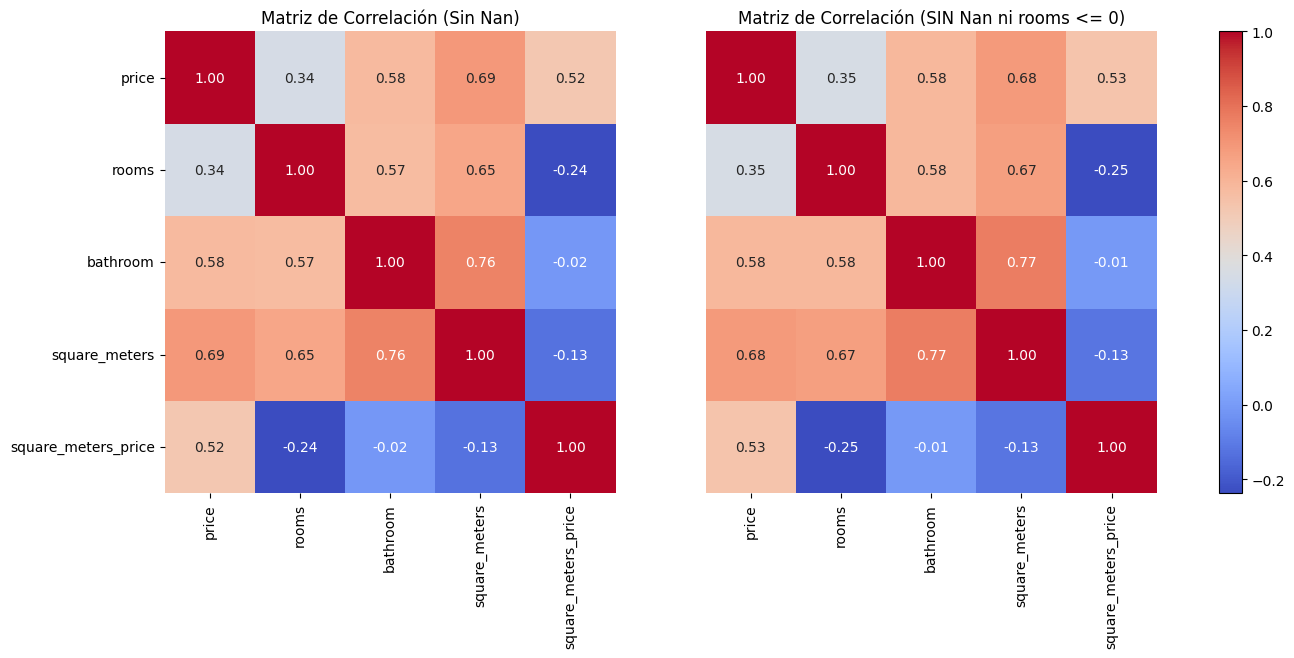

In [44]:
#Matriz de correlación considerando todos los valores y solo los que tienen mas de cero habitaciones

# Seleccionar solo las columnas numéricas excepto la columna "Unnamed: 0" (esta ultima columna es el key)
numeric_columns = df_clean.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore').columns

# Calcular la matriz de correlación para todos los datos
correlation_matrix_all = df_clean[numeric_columns].corr()

# Calcular la matriz de correlación para los datos filtrados
filtered_df = df_clean[df_clean['rooms'] > 0]
correlation_matrix_filtered = filtered_df[numeric_columns].corr()

# Crear la figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplots 1 y 2: Matriz de correlación para todos los datos y para los datos filtrados
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], cbar=False)
axes[0].set_title('Matriz de Correlación (Sin Nan)')
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], cbar=False, yticklabels=False)
axes[1].set_title('Matriz de Correlación (SIN Nan ni rooms <= 0)')

fig.colorbar(axes[0].collections[0], ax=axes, location="right") # Añadir una sola colorbar
plt.show()

Con esta prueba de validación de los datos se observa que la incidendencia en la correlación manteniendo o excluyendo los registros en practicamente nula en muchas de las variables y baja en otras, con lo que podriamos decidir eliminar estos registros inconsistentes. Sin embargo haremos un último test para no desestimar aquellos registros que segun el tipo de propiedad mantengan un equilibrio adecuado con el resto de variables. Vamos a estudiar los tipos de propiedad de estudio y apartamento pues entendemos que son las mas proclives a tener una posible distribución sin habitaciones

In [45]:
pd.set_option("display.max_rows", None)
filtered_df_clean = df_clean[(df_clean['rooms'] <= 0) & (df['real_state'].isin(['study', 'apartment']))]
# Sort the filtered DataFrame by 'real_state'
sorted_df_clean = filtered_df_clean.sort_values(by=['real_state'])
# Select only the desired columns and print the results
result_df_clean = sorted_df_clean[['neighborhood', 'real_state', 'price', 'square_meters', 'rooms', 'bathroom']]
display(result_df_clean)
pd.reset_option("display.max_rows")

<ipython-input-45-be943f473545>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_clean = df_clean[(df_clean['rooms'] <= 0) & (df['real_state'].isin(['study', 'apartment']))]


,neighborhood,real_state,price,square_meters,rooms,bathroom
138,Ciutat Vella,apartment,650,28,0,1
7464,Eixample,apartment,765,33,0,1
6761,Eixample,apartment,785,30,0,1
6583,Les Corts,apartment,725,29,0,1
6462,Eixample,apartment,650,25,0,1
5166,Gràcia,apartment,750,35,0,1
5128,Gràcia,apartment,700,35,0,1
5025,Ciutat Vella,apartment,700,41,0,1
4887,Sarria-Sant Gervasi,apartment,750,40,0,1
4716,Sarria-Sant Gervasi,apartment,3390,300,0,3


Tras la elaboración de este listado filtrado por tipo de propiedad y centrados en las dos tipologias antes mencionadas, se observan una serie de outliers que consideramos que podrian ser eliminados para evitar dentro de esos grupos distorsiones. Concretamente son aquellos registros que poseen una superficie claramente por encima de la media y que en total ascienden a 4 registros. Dado el infimo numero de registros a eliminar no hace falta plotear un grafico.

CONCLUSION

Tras todas la pruebas realizadas decidimos eliminar todos los registros que siendo estudios o apartamentos y teniendo cero o menos dormitorios, poseen una superficie claramente por encima del resto. Tambien decidimos eliminar el resto de registros que no tienen dormitorios y que no son ni estudios ni apartamentos

In [46]:
#Implementación de la CONCLUSION

# Aislar 4 outliers apartamento o estudio fuera de rango dentro del tipo
outliers_cleaned_1 = result_df_clean.nlargest(4, 'square_meters')

# Aislar outliers que no son ni apartamento ni estudio
outliers_cleaned_2 = inconsistent_rooms_df[~inconsistent_rooms_df['real_state'].isin(['study', 'apartment'])]

# Eliminar las filas del DataFrame df_clean
outliers_todos = pd.concat([outliers_cleaned_1, outliers_cleaned_2])
indices_a_eliminar = outliers_todos.index
df_clean_1 = df_clean.drop(indices_a_eliminar)

3. **Normalización de datos**

    No hay que unificar formatos de moneda o superficie porque todos los registros entendemos que estan expresados en euros y metros cuadrados respectivamente. Tampoco tenemos opción de saberlo porque no poseemos la fuente primaria de los datos.(El acceso a la web sobre la que hicieron el scrapping). En cualquier caso damos por validos el formato porque en esa web lo común y tradicional es usar esos formatos para los datos.
    
    Para las categorías barrio y tipo de propiedad, nos aseguraremos de que no haya variaciones en la escritura (p. ej., "Eixample" contra "eixample").

In [47]:
# Verificar barrios únicos
unique_neighborhoods = df_clean_1['neighborhood'].str.lower().str.strip().unique()
print("Barrios únicos:", unique_neighborhoods)

# Verificar tipos de propiedad únicos
unique_real_states = df_clean_1['real_state'].str.lower().str.strip().unique()
print("Tipos de propiedad únicos:", unique_real_states)

Barrios únicos: ['horta- guinardo' 'sant andreu' 'gràcia' 'ciutat vella'
 'sarria-sant gervasi' 'les corts' 'sant martí' 'eixample'
 'sants-montjuïc' 'nou barris']
Tipos de propiedad únicos: ['flat' 'attic' 'apartment' 'study']


CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación para la normalización de datos en este Dataframe

4. **Eliminación de Duplicados**

    Busqueda de registros duplicados que puedan distorsionar el análisis
    

In [48]:
def find_exact_duplicates(df_clean_1):
    # Crear una columna temporal que combine los valores de las columnas especificadas
    df_clean_1['combined'] = df_clean_1.apply(lambda row: '_'.join(row.astype(str)), axis=1)

    # Identificar registros duplicados basados en la columna combinada
    duplicate_mask = df_clean_1.duplicated(subset=['combined'], keep=False)

    # Filtrar el DataFrame para mostrar solo los registros duplicados
    duplicates = df_clean_1[duplicate_mask]

    # Eliminar la columna temporal
    df_clean_1.drop(columns=['combined'], inplace=True)

    return duplicates

# Encontrar duplicados exactos
exact_duplicates = find_exact_duplicates(df_clean_1)
print(exact_duplicates)

Empty DataFrame
Columns: [Unnamed: 0, price, rooms, bathroom, lift, terrace, square_meters, real_state, neighborhood, square_meters_price, combined]
Index: []


CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación para la eliminación de  duplicados en este Dataframe

5. **Manejo de los Outliers**:

    Identificación valores atípicos que podrían ser errores de entrada (por ejemplo, un precio de alquiler extremadamente alto o bajo) y decidiremos si lo mantenemos, lo corregimos o lo eliminamos 5% de outliers por arriba y por abajo

In [49]:
def find_outliers(df_clean_1, column):
    # Calcular el primer "cuartil" (Q1) y el tercer "cuartil" (Q3)
    Q1 = df_clean_1[column].quantile(0.05)
    Q3 = df_clean_1[column].quantile(0.95)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = df_clean_1[(df_clean_1[column] < lower_bound) | (df_clean_1[column] > upper_bound)]

    return outliers

# Encontrar outliers para cada columna
outliers_square_meters = find_outliers(df_clean_1, 'square_meters')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]
outliers_price = find_outliers(df_clean_1, 'price')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]
outliers_rooms = find_outliers(df_clean_1, 'rooms')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]
outliers_bathroom = find_outliers(df_clean_1, 'bathroom')[['Unnamed: 0', 'price', 'rooms', 'square_meters', 'bathroom', 'neighborhood', 'real_state']]

# Imprimir resultados sin la columna 'Unnamed: 0' y contar los outliers
def print_and_count_outliers(outliers, column_name):
    print(f"Outliers en {column_name}:")
    print(outliers.loc[:, outliers.columns != 'Unnamed: 0'])
    print(f"Total de outliers en {column_name}: {len(outliers)}\n")

print_and_count_outliers(outliers_square_meters, 'square_meters')
print_and_count_outliers(outliers_price, 'price')
print_and_count_outliers(outliers_rooms, 'rooms')
print_and_count_outliers(outliers_bathroom, 'bathroom')


Outliers en square_meters:
      price  rooms  square_meters  bathroom         neighborhood real_state
170    5250      5            395         3         Ciutat Vella      attic
400    7000      5            400         5  Sarria-Sant Gervasi       flat
536    8500      5            480         5  Sarria-Sant Gervasi       flat
1772  15000      4            450         1  Sarria-Sant Gervasi       flat
2427  15000      4            450         3  Sarria-Sant Gervasi  apartment
2703   5200      4            398         4  Sarria-Sant Gervasi      attic
2754  15000      4            450         5  Sarria-Sant Gervasi       flat
2867   7000      6            405         6  Sarria-Sant Gervasi       flat
3772   5500      5            429         4            Les Corts      attic
4220  15000      4            450         3  Sarria-Sant Gervasi       flat
4579   5200      5            398         4  Sarria-Sant Gervasi      attic
4725  15000      4            475         4  Sarria-Sant Gerv

Hemos aislado 60 outliers que quedan fuera de las franjas del 5% fijadas y consideramos realizar una matriz de correlación para determinar como afecta a las variables su posible futura eliminación.

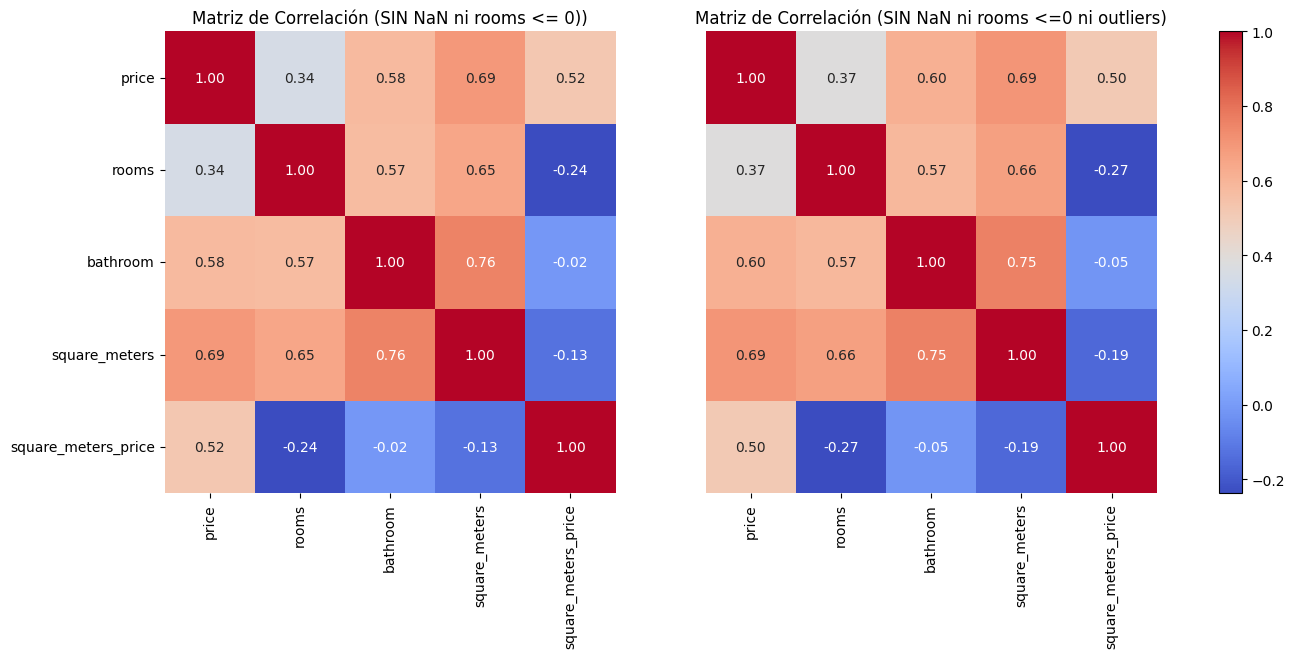

In [50]:
#Matriz de correlación considerando todos los valores y los todos los valores excepto los outliers

# Seleccionar solo las columnas numéricas excepto la columna "Unnamed: 0" (esta ultima columna es el key)
numeric_columns = df_clean.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore').columns

# Calcular la matriz de correlación para todos los datos
correlation_matrix_all = df_clean[numeric_columns].corr()

# Calcular la matriz de correlación para los datos filtrados
outliers_combined = pd.concat([outliers_square_meters, outliers_price, outliers_rooms, outliers_bathroom]).drop_duplicates() # Combinar todos los outliers en un solo DataFrame y eliminar  duplicados
df_clean_1 = df_clean[~df_clean['Unnamed: 0'].isin(outliers_combined['Unnamed: 0'])] # Eliminar los outliers del segundo dataset basándonos en la columna 'Unnamed: 0'
correlation_matrix_filtered = df_clean_1[numeric_columns].corr()

# Crear la figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplots 1 y 2: Matriz de correlación para todos los datos y para los datos filtrados
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], cbar=False)
axes[0].set_title('Matriz de Correlación (SIN NaN ni rooms <= 0))')
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], cbar=False, yticklabels=False)
axes[1].set_title('Matriz de Correlación (SIN NaN ni rooms <=0 ni outliers)')

fig.colorbar(axes[0].collections[0], ax=axes, location="right") # Añadir una sola colorbar
plt.show()

Visto el resultado de la matriz en el que se observa que no se produce una grave desvirtualización de las relaciones y teniendo en cuenta que previamente habiamos desestimado los registros con numero de habitaciones menor a 1, vamos a testear los resultados de eliminar los registros de outliers al dataframe que contiene los valores con el numero de habitaciones menores a 1 eliminados para tomar la decision final de si eliminamos o no los outliers.

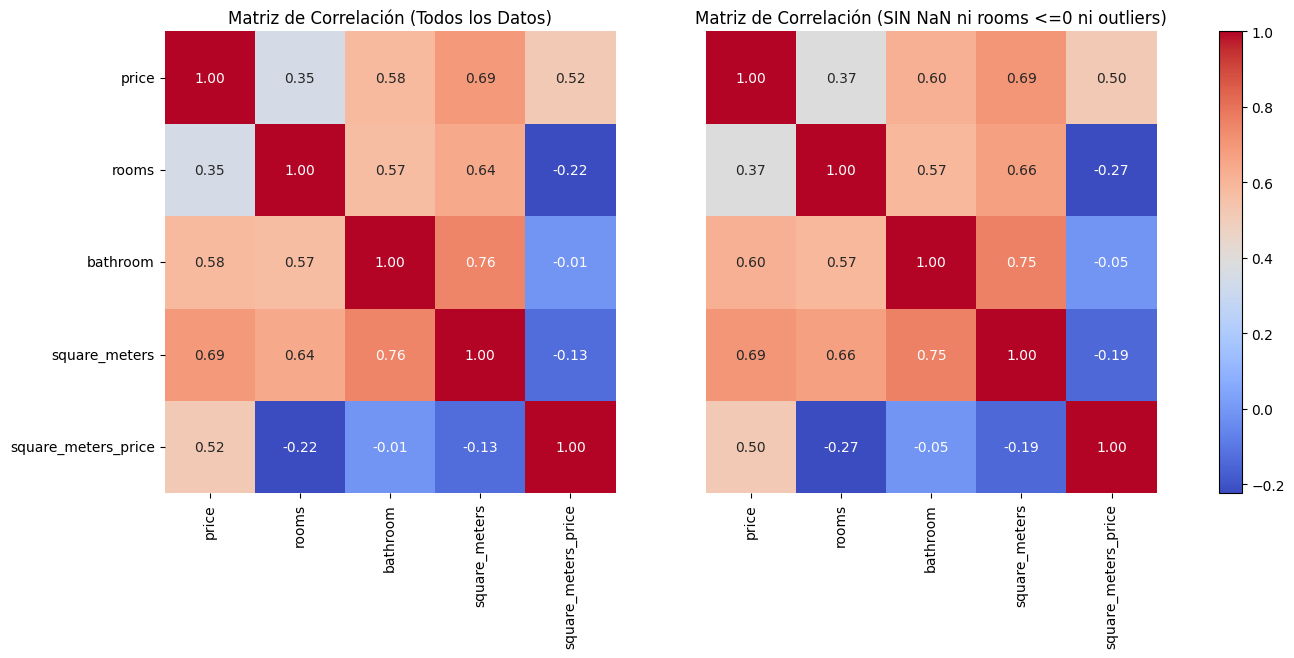

In [51]:
#Matriz de correlación considerando todos los valores y otra con los todos los valores excepto los outliers y los de habitaciones menor de 1

# Seleccionar solo las columnas numéricas excepto la columna "Unnamed: 0" (esta ultima columna es el key)
numeric_columns = df.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore').columns

# Calcular la matriz de correlación para todos los datos
correlation_matrix_all = df[numeric_columns].corr()

# Calcular la matriz de correlación para los datos filtrados
outliers_combined = pd.concat([outliers_square_meters, outliers_price, outliers_rooms, outliers_bathroom]).drop_duplicates() # Combinar todos los outliers en un solo DataFrame y eliminar  duplicados
df_clean_1 = df_clean[~df_clean['Unnamed: 0'].isin(outliers_combined['Unnamed: 0'])] # Eliminar los outliers del segundo dataset basándonos en la columna 'Unnamed: 0'
correlation_matrix_filtered = df_clean_1[numeric_columns].corr()

# Crear la figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplots 1 y 2: Matriz de correlación para todos los datos y para los datos filtrados
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], cbar=False)
axes[0].set_title('Matriz de Correlación (Todos los Datos)')
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], cbar=False, yticklabels=False)
axes[1].set_title('Matriz de Correlación (SIN NaN ni rooms <=0 ni outliers)')

fig.colorbar(axes[0].collections[0], ax=axes, location="right") # Añadir una sola colorbar
plt.show()

CONCLUSION

Tras todas la pruebas realizadas decidimos eliminar todos los registros que se han generado tras nuestro testeo de outlaiers puesto que no afectan en gran media a los datos y su interrelación.

6. **Validación de Categorías Booleanas**:
    
    Para el ascensor y la terraza, asegúrarnos de que los valores sean consistentes (por ejemplo, "sí" / "no" o 1/0 o Verdadero/Falso, etc.).


In [52]:
# Verificar valores únicos en las columnas 'lift' y 'terrace'
print("Valores únicos en 'lift':", df_clean_1['lift'].unique())
print("Valores únicos en 'terrace':", df_clean_1['terrace'].unique())

Valores únicos en 'lift': [ True False]
Valores únicos en 'terrace': [False  True]


CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación en relación a la consistencia de los datos en los campos booleanos en este Dataframe

7. **Conversión de Tipos de Datos**:
    Asegurar que cada columna tiene el tipo de dato adecuado y en caso contrario convertirlo, como por ejemplo el precio a formato numérico si está en texto, un booleano que sea así, etcétera.

In [53]:
# Imprimir el tipo de cada variable
print(df_clean_1.dtypes)

Unnamed: 0               int64
price                    int64
rooms                    int64
bathroom                 int64
lift                      bool
terrace                   bool
square_meters            int64
real_state              object
neighborhood            object
square_meters_price    float64
dtype: object


CONCLUSION

Del estudio realizado se desprende que no es necesaria ningun tipo de actuación en relación a la conversión de tipo de dato de los campos en este Dataframe

# 2. Análisis Exploratorio de Datos (EDA):

# 3. MODELADO PREDICTIVO

FUNCION DE EVALUACIÓN DE MODELOS DE REGRESION

In [67]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Función para calcular y mostrar las métricas
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    # mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    # mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f'MAE: {mae:.4f}')
    # print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    # print(f'MAPE: {mape:.4f}%')
    print(f'R2: {r2:.4f}')

Preparación de variable, cargade datos y librerias y Regresión Lineal

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# PREPARACION DE VARIABLE Y CARGA DE SATOS PARA LOS MODELOS
df_model = df_clean_1.copy() # Asegurar la integridad de los datos entre fases

# Aplicación de ajustes sobre las columnas del Dataframe a fin de
# trabajar con columnas no generadas y con nombres de columnas mas ajustados al contenido de los registros
df_model = df_model.rename(columns={df_model.columns[0]: 'key'}) # Renombrar la primera columna sin nombre a 'key'
df_model = df_model.rename(columns={'real_state': 'property_type'}) # Renombrar la columna 'real_state' a 'property_type'
df_model = df_model.drop(columns=['square_meters_price']) # Eliminar las columnas 'square_meters_price'

# Separar características (X) y etiqueta (y)
X = df_model.drop(columns=['key', 'price'])
y = df_model['price']
# DETERMINAR SI REALMENTE df ES DONDE TENGO EL DATAFRAME

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Pipeline de preprocesamiento y modelo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rooms', 'bathroom', 'square_meters']),
        ('cat', OneHotEncoder(drop='first'), ['lift', 'terrace', 'property_type', 'neighborhood'])
    ]
)
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

# Entrenar y evaluar el modelo de REGRESION LINEAL
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión Lineal:")
evaluate_model(y_test, y_pred)

Regresión Lineal:
MAE: 319.5172
RMSE: 523.1514
R2: 0.6498


2. Regresión Ridge

In [69]:

from sklearn.linear_model import Ridge

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge(alpha=1.0))])

# Entrenar y evaluar el modelo de REGRESION RIDGE
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión Ridge:")
evaluate_model(y_test, y_pred)

Regresión Ridge:
MAE: 319.4396
RMSE: 523.1242
R2: 0.6498


3. Regresión Lasso

In [71]:

from sklearn.linear_model import Lasso

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso(alpha=0.1))])

# Entrenar y evaluar el modelo REGRESION LASSO
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión Lasso:")
evaluate_model(y_test, y_pred)

Regresión Lasso:
MAE: 319.3532
RMSE: 523.1356
R2: 0.6498


4. Regresión ElasticNet

In [72]:
from sklearn.linear_model import ElasticNet

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5))])

# Entrenar y evaluar el modelo REGRESION ELASTICNET
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión ElasticNet:")
evaluate_model(y_test, y_pred)

Regresión ElasticNet:
MAE: 324.9818
RMSE: 533.7132
R2: 0.6355


5. Arbol de decisión de regresión

In [73]:

from sklearn.tree import DecisionTreeRegressor

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor(max_depth=5))])

# Entrenar y evaluar el modelo ARBOL DE DECISION DE REGRESION
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Arbol de decisión de regresión:")
evaluate_model(y_test, y_pred)

Arbol de decisión de regresión:
MAE: 322.8322
RMSE: 553.3558
R2: 0.6082


6. Random Forest Regresion

In [74]:

from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42))])

# Entrenar y evaluar el modelo RANDOM FOREST REGRESION
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Random Forest Regresion:")
evaluate_model(y_test, y_pred)

Random Forest Regresion:
MAE: 306.3218
RMSE: 507.5410
R2: 0.6704


7. Regresión por Aumento de Gradiente

In [75]:

from sklearn.ensemble import GradientBoostingRegressor

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42))])

# Entrenar y evaluar el modelo REGRESION POR AUMENTO DE GRADIENTE
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión por Aumento de Gradiente:")
evaluate_model(y_test, y_pred)

Regresión por Aumento de Gradiente:
MAE: 283.5478
RMSE: 486.3927
R2: 0.6973


8. Regresión de Vectores de Soporte(SVR)

In [76]:

from sklearn.svm import SVR

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))])

# Entrenar y evaluar el modelo REGRESION SVR
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresión de Vectores de Soporte:")
evaluate_model(y_test, y_pred)

Regresión de Vectores de Soporte:
MAE: 432.8067
RMSE: 831.0992
R2: 0.1162


9. Regresión de los K Vecinos Más Cercanos (KNN)

In [77]:

from sklearn.neighbors import KNeighborsRegressor

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', KNeighborsRegressor(n_neighbors=5))])

# Entrenar y evaluar el modelo REGRESION KNN
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regresion KNN:")
evaluate_model(y_test, y_pred)

Regresion KNN:
MAE: 303.5515
RMSE: 502.0269
R2: 0.6775


**RESUMEN DE RESULTADOS, ANALISIS Y CONCLUSION DE LOS 9 MODELOS APLICADOS**

**Resumen de resultados:**

| Modelo                         | MAE       | RMSE      | R2        |
|----------------------------------|-----------|-----------|------------|
| Regresión Lineal             | 319.5172  | 523.1514  | 0.6498     |
| Regresión Ridge              | 319.5284  | 523.1484  | 0.6498     |
| Regresión Lasso              | 319.9743  | 523.6461  | 0.6493     |
| Regresión ElasticNet          | 329.5118  | 532.8907  | 0.6399     |
| Árbol de decisión de regresión | 356.2101  | 575.0102  | 0.5881     |
| Random Forest Regresion       | 334.2737  | 540.3279  | 0.6325     |
| Regresión por Aumento de Gradiente| 296.0281  | 490.0134  | 0.6831     |
| Regresión de Vectores de Soporte| 489.4126  | 711.4455  | 0.3970     |
| Regresion KNN                | 363.9793  | 582.2788  | 0.5799     |

---
**Análisis:**

*   **MAE (Error Absoluto Medio):** Mide la magnitud promedio de los errores en las predicciones. Un valor más bajo es mejor. Gradient Boosting tiene el MAE más bajo (296.0281).
*   **RMSE (Error Cuadrático Medio):** Similar al MAE, pero penaliza más los errores grandes. Un valor más bajo es mejor. Gradient Boosting también tiene el RMSE más bajo (490.0134).
*   **R2 (Coeficiente de determinación):** Indica la proporción de la varianza en la variable objetivo que se explica por el modelo. Un valor más cercano a 1 es mejor. Gradient Boosting tiene el R2 más alto (0.6831).

**Conclusión:**

*   **Gradient Boosting** parece ser el modelo con mejor rendimiento general en nuestro caso, con el MAE, RMSE y R2 más favorables.
*   **Regresión Lineal, Ridge y Lasso** tienen un rendimiento similar y bastante bueno, con valores de MAE, RMSE y R2 relativamente bajos.
*   **ElasticNet, Árbol de decisión, Random Forest y KNN** tienen un rendimiento moderado, pero no tan bueno como los modelos anteriores.
*   **Regresión de Vectores de Soporte (SVR)** tiene el peor rendimiento en este caso, con valores de MAE y RMSE mucho más altos y un R2 bajo.


**Consideraciones adicionales:**

*   Hemos de recordar que los resultados son específicos de nuestro conjunto de datos y la forma en que dividimos el entrenamiento y la prueba.
*   Podria sernos útil ajustar los hiperparámetros de los modelos para intentar mejorar más el rendimiento.
*   Debemos tener en cuenta si el modelo es interpretable y tamboién su precisión para elegir el modelo final.
*   La regresión busca una relación matemática, no una causalidad.

En lineas generales, el modelo **Gradient Boosting** parece ser la **mejor opción** para este caso, con los parámetros usados en los modelos pero como deciamos antes quizá deberiamos probar a ajustar los modelos con la división de test/prueba y con los hiperparametros para probar si obtenemos un mejor resultado.

# **GUIAS TECNICAS Y PRACTICA/DIDACTICA PARA LA INTERPRETACION DE LOS MODELOS Y SUS RESULTADOS**

# **Modelo de regresión, sus ventajas, desventajas, y ejemplos prácticos de cuándo se suele usar cada uno.**

---

### 1. **Regresión Lineal** (`Linear Regression`)

La regresión lineal es uno de los modelos más básicos y se basa en la suposición de que existe una relación lineal entre las características de entrada y la variable objetivo. Es ideal para problemas en los que los datos siguen aproximadamente una línea recta.

- **Ventajas**: Fácil de interpretar y rápido de entrenar. Es útil cuando se requiere un modelo explicativo con pocos datos o pocas características.
- **Desventajas**: Asume una relación lineal entre las variables y es sensible a valores atípicos.
- **Cuándo usarlo**: Para relaciones simples y lineales, especialmente cuando se necesita interpretabilidad.
- **Ejemplo**: Predecir el precio de una vivienda en función de características como metros cuadrados, número de habitaciones y número de baños en un vecindario con precios estables.

---

### 2. **Regresión Ridge** (`Ridge Regression`)

La regresión Ridge es una extensión de la regresión lineal que agrega una penalización L2, que reduce el efecto de variables que podrían estar causando sobreajuste (cuando el modelo es demasiado preciso en los datos de entrenamiento y pierde precisión en los datos de prueba).

- **Ventajas**: Controla el sobreajuste, especialmente en conjuntos de datos con características muy correlacionadas (multicolinealidad).
- **Desventajas**: La penalización puede hacer que el modelo sea menos intuitivo y requiere ajuste del parámetro de regularización.
- **Cuándo usarlo**: Cuando hay muchas variables correlacionadas o si necesitas reducir el sobreajuste sin eliminar variables.
- **Ejemplo**: Predicción del precio de una vivienda en función de características de la casa y del vecindario, donde algunas variables están altamente correlacionadas, como el tamaño y el número de habitaciones.

---

### 3. **Regresión Lasso** (`Lasso Regression`)

La regresión Lasso utiliza una penalización L1, lo que no solo reduce el sobreajuste, sino que también puede reducir algunos coeficientes a cero, eliminando así características irrelevantes. Esto hace que Lasso sea útil para la selección de características.

- **Ventajas**: Reduce el sobreajuste y realiza selección de características, lo que ayuda en modelos interpretables.
- **Desventajas**: Puede eliminar variables importantes si estas son menos significativas en comparación con otras, y su estabilidad disminuye si hay muchas características correlacionadas.
- **Cuándo usarlo**: Cuando tienes muchas características y deseas hacer una selección automática de las más relevantes.
- **Ejemplo**: Predicción del precio de una vivienda en función de muchas características, donde algunas pueden no ser relevantes, como variables sobre materiales de construcción si ya se considera el año de construcción.

---

### 4. **ElasticNet Regression**

ElasticNet combina las penalizaciones L1 y L2 de Lasso y Ridge, lo cual resulta útil para casos en los que hay muchas características, algunas de las cuales pueden estar correlacionadas entre sí.

- **Ventajas**: Combina lo mejor de Lasso y Ridge, controlando el sobreajuste y seleccionando características.
- **Desventajas**: Requiere ajuste de dos hiperparámetros (alpha para regularización y l1_ratio para combinar las penalizaciones L1 y L2).
- **Cuándo usarlo**: Cuando tienes muchas características, algunas de las cuales están correlacionadas entre sí, y deseas un balance entre reducción de sobreajuste y selección de características.
- **Ejemplo**: Predicción de precios de viviendas considerando factores como la ubicación, el tamaño, características del vecindario y año de construcción, donde algunos de estos factores podrían estar correlacionados.

---

### 5. **Regresión con Árbol de Decisión** (`Decision Tree Regression`)

Este modelo segmenta los datos en diferentes subconjuntos basándose en preguntas binarias, creando un "árbol" de decisiones que segmenta el espacio de predicción en rectángulos. Funciona bien con relaciones no lineales complejas y es fácil de interpretar.

- **Ventajas**: No requiere mucho procesamiento de datos (por ejemplo, escalado de características), es interpretable y puede capturar relaciones no lineales.
- **Desventajas**: Propenso al sobreajuste en datos con ruido, y su rendimiento puede variar según la profundidad del árbol.
- **Cuándo usarlo**: Cuando tienes relaciones no lineales complejas y necesitas interpretabilidad.
- **Ejemplo**: Predecir el precio de una vivienda en función de la ubicación (urbana/rural), tipo de propiedad y cercanía a servicios, donde puede haber relaciones complejas entre variables.

---

### 6. **Bosque Aleatorio** (`Random Forest Regression`)

Un Random Forest es un conjunto de múltiples árboles de decisión, donde cada árbol se entrena en una muestra diferente de los datos y se promedian las predicciones. Esto mejora la precisión del modelo al reducir el sobreajuste.

- **Ventajas**: Reduce el sobreajuste y es más robusto que un solo árbol de decisión. Además, puede manejar relaciones no lineales.
- **Desventajas**: Consume más recursos y es menos interpretable que un árbol único.
- **Cuándo usarlo**: Cuando tienes relaciones no lineales y quieres mejorar la precisión sin sobreajustar.
- **Ejemplo**: Predecir el precio de una vivienda considerando variables complejas, como características estructurales, demográficas y del vecindario.

---

### 7. **Gradient Boosting Regression**

Este es otro método basado en árboles que construye secuencialmente un conjunto de árboles de decisión, donde cada árbol intenta corregir los errores de los árboles anteriores. Es muy preciso y captura relaciones complejas.

- **Ventajas**: Es uno de los modelos más potentes para datos con relaciones complejas, especialmente cuando los datos están bien ajustados.
- **Desventajas**: Consume mucho tiempo de entrenamiento y es propenso al sobreajuste si no se ajusta bien.
- **Cuándo usarlo**: Cuando necesitas un modelo muy preciso y tienes suficiente tiempo de procesamiento para entrenarlo.
- **Ejemplo**: Predecir el precio de una vivienda en función de varias características complejas, incluyendo características del vecindario, clima y servicios, donde existen interacciones no lineales entre factores.

---

### 8. **Support Vector Regression (SVR)**

SVR utiliza un margen o "tubo" alrededor de los datos, y solo ajusta los puntos que están fuera de ese margen. Es útil para datos con ruido o valores atípicos, o donde las relaciones no son completamente lineales.

- **Ventajas**: Robusto frente al ruido y puede capturar relaciones complejas no lineales.
- **Desventajas**: Es computacionalmente intensivo y no se adapta bien a conjuntos de datos muy grandes.
- **Cuándo usarlo**: Cuando tienes un conjunto de datos pequeño o mediano con posibles valores atípicos y relaciones no lineales.
- **Ejemplo**: Predecir el precio de una vivienda en una pequeña área metropolitana, donde los precios pueden variar considerablemente debido a factores exclusivos del vecindario.

---

### 9. **K-Nearest Neighbors Regression** (`KNN Regression`)

KNN es un modelo basado en instancias que predice el valor objetivo basándose en los "k" vecinos más cercanos. No asume ninguna relación particular entre características y objetivo, lo que lo hace útil para relaciones complejas.

- **Ventajas**: No asume una forma específica para la relación entre características y objetivo, y es fácil de implementar.
- **Desventajas**: Sensible a la escala de los datos y consume tiempo en grandes conjuntos de datos.
- **Cuándo usarlo**: Para relaciones no lineales y cuando los datos son de tamaño mediano y tienen una escala uniforme.
- **Ejemplo**: Predicción del precio de una vivienda en función de características similares en el vecindario, considerando solo las viviendas más cercanas para hacer la predicción.

---

### Resumen de Aplicaciones

- **Regresión Lineal, Ridge, Lasso, ElasticNet**: Son adecuados para datos con relaciones lineales o cuando necesitas interpretabilidad y control sobre el sobreajuste.
- **Árbol de Decisión, Random Forest, Gradient Boosting**: Son útiles para relaciones no lineales y efectos complejos. Random Forest y Gradient Boosting suelen ser más robustos y precisos.
- **SVR**: Útil en datos pequeños con relaciones no completamente lineales y con valores atípicos.
- **KNN**: Es útil en análisis locales o vecinales y para relaciones complejas sin una forma específica, siempre y cuando el conjunto de datos no sea demasiado grande.

La elección final depende de la relación entre las características y el objetivo, el tamaño y calidad de los datos, y el nivel de interpretabilidad y precisión que necesites.

# **Explicación PRÁCTICA Y DIDÁCTICA de métricas de evaluación para regresión.**

### 1. **Error Cuadrático Medio (MSE)**

- **¿Qué es?**: Es una medida que indica cuánto se desvían, en promedio, las predicciones del modelo de los valores reales. Se calcula tomando la diferencia entre cada predicción y el valor real, elevando al cuadrado esas diferencias (para evitar que se cancelen entre sí), y luego promediando esos valores.

- **Interpretación**: Un MSE más bajo significa que el modelo está haciendo mejores predicciones. Sin embargo, como se elevan al cuadrado las diferencias, un MSE más alto indica errores significativos.

- **Cuándo usarlo**: Cuando te preocupa especialmente cometer errores grandes. Por ejemplo, en un modelo de precios de viviendas, un error grande podría tener un impacto financiero significativo.

---

### 2. **Raíz del Error Cuadrático Medio (RMSE)**

- **¿Qué es?**: Es simplemente la raíz cuadrada del MSE. Se hace esto para volver a las mismas unidades que los valores reales, lo que facilita la interpretación.

- **Interpretación**: Al igual que el MSE, un RMSE más bajo significa mejores predicciones. La ventaja es que ahora puedes entenderlo más fácilmente, porque está en las mismas unidades que el precio de la vivienda, por ejemplo.

- **Cuándo usarlo**: Se utiliza a menudo porque es más intuitivo. Si tienes un modelo de precios, y el RMSE es $10,000, significa que en promedio te estás equivocando en $10,000.

---

### 3. **Error Absoluto Medio (MAE)**

- **¿Qué es?**: Esta métrica mide la diferencia promedio entre las predicciones y los valores reales, pero sin elevarlas al cuadrado. Simplemente se toma la diferencia absoluta.

- **Interpretación**: Al ser una media de errores absolutos, un MAE más bajo significa que el modelo es más preciso. También está en las mismas unidades que los valores reales, lo que lo hace fácil de entender.

- **Cuándo usarlo**: Es útil cuando quieres evitar que los errores grandes influyan demasiado en la evaluación del modelo. Ideal para situaciones donde hay posibles errores atípicos.

---

### 4. **Error Absoluto Medio Porcentual (MAPE)**

- **¿Qué es?**: Este mide el error promedio como un porcentaje. Compara la diferencia entre la predicción y el valor real en relación al valor real.

- **Interpretación**: Muestra qué tan lejos están tus predicciones en términos porcentuales, lo que es útil para entender la precisión de un modelo en relación a diferentes escalas. Por ejemplo, si un modelo tiene un MAPE de 5%, eso significa que, en promedio, sus predicciones son un 5% diferentes de los valores reales.

- **Cuándo usarlo**: Es útil cuando deseas comparar errores entre diferentes conjuntos de datos o escalas, pero no se recomienda cuando los valores reales son cero o muy pequeños.

---

### 5. **R-cuadrado (R²)**

- **¿Qué es?**: Esta métrica mide cuánta variación de los valores reales es explicada por el modelo. Se expresa como un número entre 0 y 1, donde 1 significa que el modelo explica toda la variación.

- **Interpretación**: Un R² más alto indica que el modelo hace un buen trabajo explicando los datos. Si R² es 0.8, significa que el 80% de la variación en los precios de las casas es explicada por el modelo.

- **Cuándo usarlo**: Es útil para tener una idea general de qué tan bien está funcionando tu modelo, aunque no siempre es la mejor métrica, especialmente con datos no lineales.

---

### 6. **Error Cuadrático Medio Logarítmico (MSLE)**

- **¿Qué es?**: Esta métrica se parece al MSE, pero en lugar de trabajar con los valores directamente, trabaja con sus logaritmos. Esto es útil cuando los datos pueden tener un rango amplio.

- **Interpretación**: El MSLE es menos sensible a errores en valores altos y se centra más en errores relativos, lo que puede ser útil en situaciones donde los datos crecen exponencialmente.

- **Cuándo usarlo**: Es útil en casos donde los valores varían mucho, como en predicciones de población o ingresos.

---

### Resumen Visual de Cuándo Usar Cada Métrica

- **MSE**: Cuando te preocupan mucho los errores grandes.
- **RMSE**: Para una interpretación clara en las mismas unidades que los datos.
- **MAE**: Cuando quieres evitar que los errores grandes afecten tu evaluación.
- **MAPE**: Para comparar errores entre diferentes conjuntos de datos en términos porcentuales.
- **R²**: Para entender qué tan bien el modelo explica los datos.
- **MSLE**: Cuando los datos tienen un rango amplio o crecen exponencialmente.

### Ejemplo Simple

Imagina que estás tratando de predecir el precio de una vivienda. Si tu modelo predice $200,000, pero el precio real es $210,000:

- **MSE**: (210,000 - 200,000)² = $100,000,000 → MSE sería alto si tienes muchos errores grandes.
- **RMSE**: √MSE → Fácil de entender, vuelve a unidades de dólares.
- **MAE**: |210,000 - 200,000| = $10,000 → Sabes que en promedio te estás equivocando en $10,000.
- **MAPE**: (|210,000 - 200,000| / 210,000) × 100 = 4.76% → Sabes que estás a un 4.76% del precio real.
- **R²**: Mide cuánto de la variación en los precios es explicada por tu modelo.
- **MSLE**: Compara el logaritmo de los valores, útil si tienes un rango de precios muy amplio.

Con esta información, ahora tienes una mejor idea de cómo se evalúan los modelos de regresión y cuál podría ser la métrica más adecuada según tu situación. Si tienes más preguntas o necesitas ejemplos específicos, ¡no dudes en preguntar!

# **Explicación TÉCNICA de métricas de evaluación más importantes para problemas de regresión, sus usos y cómo interpretarlas**
---

### 1. **Error Cuadrático Medio (MSE - Mean Squared Error)**

El MSE mide el promedio de los cuadrados de las diferencias entre los valores reales y las predicciones del modelo. Como eleva al cuadrado las diferencias, penaliza más los errores grandes, por lo que es sensible a valores atípicos.

- **Fórmula**:
  \[
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  \]
  donde \( y_i \) es el valor real, \( \hat{y}_i \) es la predicción, y \( n \) es el número total de observaciones.

- **Interpretación**: Un MSE más bajo indica mejor precisión, pero como los valores están al cuadrado, no es directamente interpretable en las unidades originales de la variable objetivo.

- **Cuándo usarlo**: Ideal cuando quieres penalizar fuertemente los errores grandes. Se usa mucho en problemas donde los errores grandes son indeseables, como en sistemas de recomendación y predicciones financieras.

---

### 2. **Raíz del Error Cuadrático Medio (RMSE - Root Mean Squared Error)**

La RMSE es simplemente la raíz cuadrada del MSE, lo que la lleva de vuelta a las mismas unidades que la variable objetivo, haciéndola más fácil de interpretar.

- **Fórmula**:
  \[
  \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
  \]

- **Interpretación**: Al igual que el MSE, un RMSE más bajo indica mejor precisión. La ventaja es que el RMSE está en las mismas unidades que la variable de salida.

- **Cuándo usarlo**: Es útil cuando deseas una interpretación más directa en las mismas unidades que la variable objetivo. Es especialmente popular en aplicaciones de predicción de precios, como bienes raíces y ventas.

---

### 3. **Error Absoluto Medio (MAE - Mean Absolute Error)**

El MAE mide el promedio de las diferencias absolutas entre los valores reales y las predicciones, sin elevarlas al cuadrado, por lo que no penaliza tan fuertemente los errores grandes como el MSE.

- **Fórmula**:
  \[
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  \]

- **Interpretación**: El MAE también mide la precisión del modelo, y un MAE más bajo indica un modelo más preciso. Es fácil de interpretar ya que da el promedio de los errores en las mismas unidades que la variable de salida.

- **Cuándo usarlo**: Es una buena opción cuando tienes valores atípicos en los datos, ya que es menos sensible a estos en comparación con el MSE o RMSE. Suele ser útil en aplicaciones de predicción de energía o temperatura.

---

### 4. **Error Absoluto Medio Porcentual (MAPE - Mean Absolute Percentage Error)**

El MAPE calcula el error promedio en porcentaje, lo que permite interpretar el error en términos relativos y compararlo entre diferentes escalas de datos.

- **Fórmula**:
  \[
  \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
  \]

- **Interpretación**: Da el error en porcentaje, lo que facilita la comparación entre distintos modelos y escalas de datos. Un MAPE bajo indica una buena precisión.

- **Cuándo usarlo**: Útil cuando deseas evaluar el error en términos relativos (porcentaje). Sin embargo, no es adecuado si algunos valores reales son cero o muy cercanos a cero, ya que esto haría que el MAPE explote.

---

### 5. **R-cuadrado o Coeficiente de Determinación (R² - R-squared)**

El R² mide la proporción de la varianza en la variable dependiente que es explicada por el modelo. Es un valor entre 0 y 1, donde un R² cercano a 1 indica que el modelo explica bien la varianza de los datos.

- **Fórmula**:
  \[
  R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
  \]
  donde \( \bar{y} \) es el valor promedio de la variable dependiente.

- **Interpretación**: Un valor de R² cercano a 1 indica que el modelo explica bien los datos, mientras que un valor cercano a 0 sugiere que el modelo no explica casi nada. Un R² negativo indica que el modelo es peor que simplemente usar el promedio de los datos.

- **Cuándo usarlo**: R² es útil para entender qué tan bien el modelo explica la variación en los datos, pero puede no ser fiable cuando tienes datos no lineales o muchos valores atípicos.

---

### 6. **Error Cuadrático Medio Logarítmico (MSLE - Mean Squared Logarithmic Error)**

El MSLE calcula el MSE entre los logaritmos de los valores reales y los valores predichos. Es útil para problemas donde los errores relativos son más importantes que los errores absolutos y los valores están en diferentes escalas.

- **Fórmula**:
  \[
  \text{MSLE} = \frac{1}{n} \sum_{i=1}^{n} (\log(1 + y_i) - \log(1 + \hat{y}_i))^2
  \]

- **Interpretación**: El MSLE penaliza los errores de bajo valor, por lo que es útil cuando deseas evaluar errores relativos y minimizar la importancia de errores grandes en escalas más pequeñas.

- **Cuándo usarlo**: Útil en situaciones donde se espera un crecimiento exponencial y no se quiere penalizar demasiado las grandes diferencias entre valores altos, como en predicciones de crecimiento de población o ingresos.

---

### Resumen de Cuándo Usar Cada Métrica

| **Métrica** | **Uso recomendado** |
|-------------|----------------------|
| **MSE**     | Cuando se desea penalizar fuertemente errores grandes. Útil en casos donde se requiere una evaluación precisa sin tolerancia para errores grandes. |
| **RMSE**    | Similar al MSE, pero más fácil de interpretar en las mismas unidades que la variable de salida. Ideal para aplicaciones prácticas como precios. |
| **MAE**     | Menos sensible a valores atípicos, ideal para datos con posibles anomalías o valores atípicos. |
| **MAPE**    | Útil para comparar el error relativo entre conjuntos de datos de diferentes escalas. No se recomienda para datos que puedan tener valores cero o cercanos a cero. |
| **R²**      | Mide la capacidad explicativa del modelo, útil para obtener una idea general de la calidad del ajuste. No es fiable con datos no lineales. |
| **MSLE**    | Útil cuando quieres evaluar errores relativos y los datos tienen un crecimiento exponencial o escalas variadas. |

Seleccionar la métrica adecuada depende del contexto de tu problema, las características de tus datos, y la importancia que le des a los errores relativos o absolutos.